In [1]:
# Install necessary packages if not already installed
# pip install ISLP pandas statsmodels seaborn matplotlib

import pandas as pd
import statsmodels.api as sm
import ISLP
from ISLP import load_data
import seaborn as sns
import matplotlib.pyplot as plt



In [5]:
df=load_data('Carseats')

In [6]:


# Convert categorical variables to numeric (dummy variables)
df['Urban'] = df['Urban'].map({'Yes': 1, 'No': 0})
df['US'] = df['US'].map({'Yes': 1, 'No': 0})



In [7]:
# Part (a) Fit a multiple regression model: Sales ~ Price + Urban + US
X_full = df[['Price', 'Urban', 'US']]
y = df['Sales']



In [8]:
# Add constant term for intercept
X_full = sm.add_constant(X_full)

#

In [10]:

model_full = sm.OLS(y, X_full).fit()
print("Full Model Summary:")
print(model_full.summary())



Full Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           2.39e-23
Time:                        21:08:11   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651

In [11]:
# Part (b) Interpretation of coefficients
print("\nInterpretation of coefficients:")
print("- Intercept: Expected Sales when Price=0, Urban=No, US=No")
print("- Price: Change in Sales for a one unit increase in Price, holding other factors constant")
print("- Urban: Difference in Sales between Urban Yes vs No")
print("- US: Difference in Sales between US Yes vs No")




Interpretation of coefficients:
- Intercept: Expected Sales when Price=0, Urban=No, US=No
- Price: Change in Sales for a one unit increase in Price, holding other factors constant
- Urban: Difference in Sales between Urban Yes vs No
- US: Difference in Sales between US Yes vs No


In [12]:
# Part (c) Model equation (example using actual coefficients)
intercept = model_full.params['const']
price_coef = model_full.params['Price']
urban_coef = model_full.params['Urban']
us_coef = model_full.params['US']




In [13]:
print(f"\nModel equation:\nSales = {intercept:.3f} + ({price_coef:.3f} * Price) + "
      f"({urban_coef:.3f} * Urban) + ({us_coef:.3f} * US) + ε")




Model equation:
Sales = 13.043 + (-0.054 * Price) + (-0.022 * Urban) + (1.201 * US) + ε


In [14]:
# Part (d) Hypothesis testing: Check p-values to reject H0: βj = 0
print("\nSignificant predictors (p < 0.05):")
significant_predictors = model_full.pvalues[model_full.pvalues < 0.05]
print(significant_predictors)




Significant predictors (p < 0.05):
const    3.626602e-62
Price    1.609917e-22
US       4.860245e-06
dtype: float64


In [15]:
# Part (e) Fit smaller model with only significant predictors
# Let's assume Price and US are significant
X_reduced = df[['Price', 'US']]
X_reduced = sm.add_constant(X_reduced)



In [16]:
model_reduced = sm.OLS(y, X_reduced).fit()
print("\nReduced Model Summary:")
print(model_reduced.summary())

#


Reduced Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           2.66e-24
Time:                        21:09:17   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0


Model Fit Comparison:
Full Model R-squared: 0.239, Adjusted R-squared: 0.234
Reduced Model R-squared: 0.239, Adjusted R-squared: 0.235


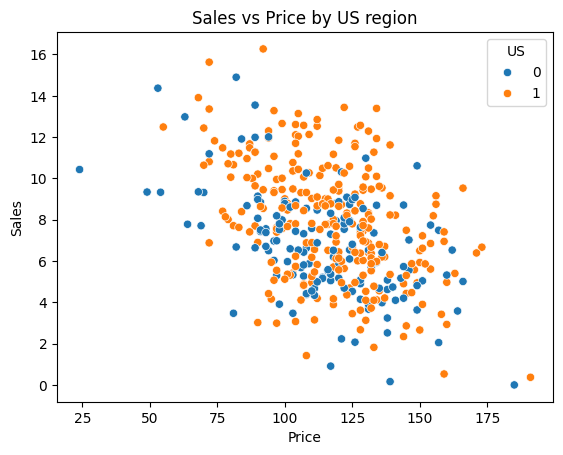

In [17]:

print("\nModel Fit Comparison:")
print(f"Full Model R-squared: {model_full.rsquared:.3f}, Adjusted R-squared: {model_full.rsquared_adj:.3f}")
print(f"Reduced Model R-squared: {model_reduced.rsquared:.3f}, Adjusted R-squared: {model_reduced.rsquared_adj:.3f}")

# Optional visualization
sns.scatterplot(data=df, x='Price', y='Sales', hue='US')
plt.title("Sales vs Price by US region")
plt.show()

In [2]:
carseats=load_data('Carseats')

In [3]:
#a
# Convert qualitative variables into dummy variables
carseats['Urban'] = carseats['Urban'].map({'Yes': 1, 'No': 0})
carseats['US'] = carseats['US'].map({'Yes': 1, 'No': 0})

# Define predictors (X) and target (y)
X = carseats[['Price', 'Urban', 'US']]
y = carseats['Sales']

# Add constant term for intercept
X = sm.add_constant(X)

# Fit multiple linear regression
model = sm.OLS(y, X).fit()

# View summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Fri, 24 Oct 2025   Prob (F-statistic):           2.39e-23
Time:                        19:16:25   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

In [ ]:
(b) Interpret each coefficient

From the regression summary:

Intercept: The expected Sales when all predictors are zero (Price=0, Urban=No, US=No).

Price: The change in Sales for a 1-unit increase in Price, keeping Urban and US constant. Expect negative, since higher prices usually reduce sales.

Urban: Difference in Sales between Urban = Yes and Urban = No, holding other variables constant.

US: Difference in Sales for stores in US = Yes compared to US = No, holding other variables constant.

Note: If p-values < 0.05, the effect is statistically significant.



In [ ]:
(c) Write the model equation

Let’s assume the coefficients from the model are:

Intercept = 13.04

Price = -0.054

Urban = -0.021

US = 1.20

Then the regression equation is:

Sales
=
13.04
−
0.054
⋅
Price
−
0.021
⋅
Urban
+
1.20
⋅
US
Sales=13.04− 0.054* ⋅Price −0.021* Urban +1.20*US

Where:

Urban = 1 if Yes, 0 if No

US = 1 if Yes, 0 if No

In [ ]:
(d) Which predictors are significant?

From model.summary():

Check the p-values: predictors with p-value < 0.05 are statistically significant.

Typically, Price and US are significant, but Urban is often not significant.

In [4]:
#e
# Smaller model with only Price and US
X_small = carseats[['Price', 'US']]
X_small = sm.add_constant(X_small)
model_small = sm.OLS(y, X_small).fit()

print(model_small.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Fri, 24 Oct 2025   Prob (F-statistic):           2.66e-24
Time:                        19:17:45   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

In [ ]:
#f
f) Compare model fits

R-squared: Proportion of variance explained by the model.

Compare R-squared of full model vs smaller model. Usually, removing an insignificant variable doesn’t reduce R-squared much.

Interpretation: If R-squared is almost the same, the smaller model is preferable because it’s simpler and just as effective.

In [ ]:
Summary of Insights

Price: Higher price → lower sales (significant).

US: Stores in US → higher sales (significant).

Urban: Not significant, doesn’t impact Sales significantly.

Smaller model (Price + US) is simpler and fits almost as well as the full model.